In [20]:
import pandas as pd
import emoji
import matplotlib.pyplot as plt

In [ ]:
!pip install emoji --upgrade mplcyberpunk

# First Plot

In [47]:
df2 = pd.read_csv('/home/lewagonvaleria/code/mfcorredor/DeepFeelings/raw_data/example_amz_rev.csv')
df2 = df2[['texts', 'date','polarity']]
df2["polarity"].replace([2,1,0],['Positive','Neutral','Negative'], inplace=True)
df2 = df2[['date','polarity']]
df2.head()
df2.sort_values(by = ['date'], inplace=True)
df2['date']= pd.to_datetime(df2['date'])

In [48]:
df2.shape

(50, 2)

In [49]:
df2['polarity'].value_counts()

Positive    21
Negative    16
Neutral     13
Name: polarity, dtype: int64

In [50]:
positive_percentage = int(21/50*100)
negative_percentage = int(16/50*100)
neutral_percentage = int(13/50*100)
print(positive_percentage, negative_percentage, neutral_percentage)

42 32 26


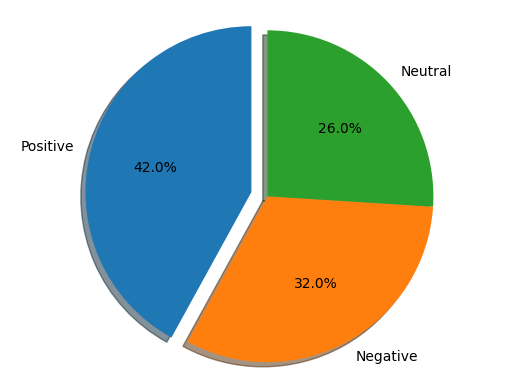

In [51]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [42, 32, 26]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# this slider allows the user to select a number of lines
# to display in the dataframe
# the selected value is returned by st.slider

# and used in order to select the displayed lines
plt.show()

# Second Plot (to eliminate, just example)

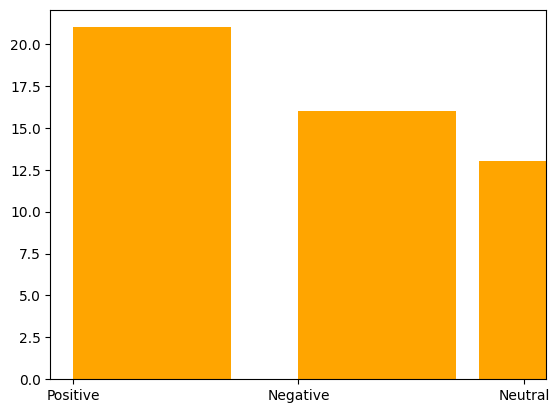

In [89]:
fig2, ax1 = plt.subplots()
#plt.figure(figsize=(12,5))
plt.hist(df2['polarity'], color='orange', width=0.7);

# Third Plot

In [74]:
df = pd.read_csv('/home/lewagonvaleria/code/mfcorredor/DeepFeelings/raw_data/example_amz_rev.csv').iloc[:,1:]

In [75]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by = ['date'] , inplace = True)

In [76]:
df['polarity'] = df['polarity'].map({0:'negative',1:'neutral',2:'positive'})
df.head()

,texts,date,polarity
7,i absolutly loved this iphone xr it was wonderful,2019-04-03,positive
18,described as “fully unlocked” received it in e...,2019-04-12,positive
0,i was a little sceptical buying this phone bec...,2019-04-27,positive
12,it took a little while for it to arrive but ot...,2019-05-09,negative
3,i purchased this phone for my daughter and it ...,2019-05-14,neutral


In [77]:
df['year-month'] = df['date'].apply(lambda x : '-'.join(str(x).split('-')[:2]))
df.head()

,texts,date,polarity,year-month
7,i absolutly loved this iphone xr it was wonderful,2019-04-03,positive,2019-04
18,described as “fully unlocked” received it in e...,2019-04-12,positive,2019-04
0,i was a little sceptical buying this phone bec...,2019-04-27,positive,2019-04
12,it took a little while for it to arrive but ot...,2019-05-09,negative,2019-05
3,i purchased this phone for my daughter and it ...,2019-05-14,neutral,2019-05


In [78]:
polarities_df = df.groupby('year-month').agg( polarity_fractions = 
        ('polarity', 
         lambda x : x.value_counts(normalize = True).to_dict()))
polarities_df

,polarity_fractions
year-month,
2019-04,{'positive': 1.0}
2019-05,"{'positive': 0.5555555555555556, 'negative': 0..."
2019-06,"{'neutral': 0.5, 'negative': 0.25, 'positive':..."
2019-07,"{'positive': 0.6, 'negative': 0.4}"
2019-08,"{'neutral': 0.4, 'positive': 0.4, 'negative': ..."
2019-09,"{'positive': 0.5, 'neutral': 0.5}"
2019-11,{'negative': 1.0}
2019-12,"{'positive': 0.5, 'neutral': 0.5}"
2020-01,{'neutral': 1.0}


In [79]:
polars = ['negative','neutral','positive']

for polarity in polars:
    polarities_df.loc[:,polarity] = polarities_df['polarity_fractions']\
                                    .apply(lambda polarities_dict : polarities_dict.get(polarity))\
                                    .fillna(0.0)\
                                    .round(2)

In [80]:
polarities_df.drop( columns = ['polarity_fractions'] , inplace= True)

In [81]:
polarities_df

,negative,neutral,positive
year-month,,,
2019-04,0.00,0.00,1.00
2019-05,0.22,0.22,0.56
2019-06,0.25,0.50,0.25
2019-07,0.40,0.00,0.60
2019-08,0.20,0.40,0.40
2019-09,0.00,0.50,0.50
2019-11,1.00,0.00,0.00
2019-12,0.00,0.50,0.50
2020-01,0.00,1.00,0.00


In [82]:
dummy = polarities_df.iloc[1,0]
dummy

0.22

In [83]:
emoji.emojize('😃')

'😃'

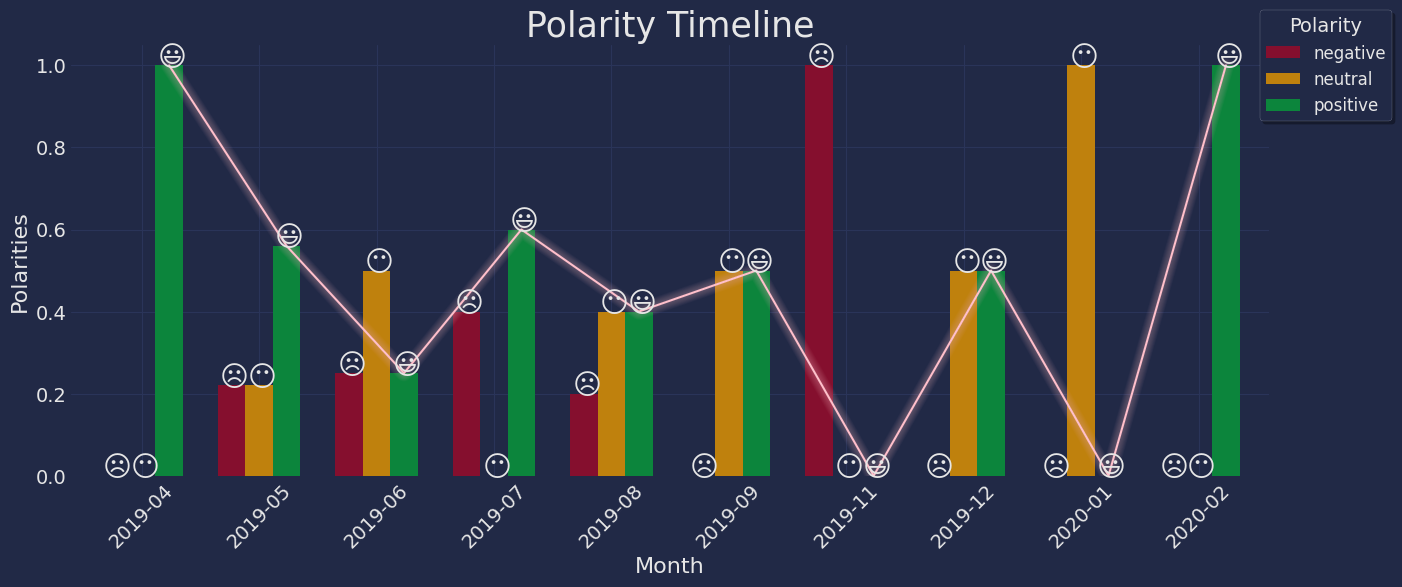

In [93]:
import mplcyberpunk

polarity_colors = ['#850f2e','#bf810d','#0c853c']
plt.rcParams["font.family"] = "cursive"


polarity_emojis = [emoji.emojize('☹️') , emoji.emojize('😶') , emoji.emojize('😃')]

# places correctly the emojies on the rectangle
def get_index(idx, length):
    return  [idx < i*length for i in range(1,length)].index(True)

# for the background
with plt.style.context('cyberpunk'):
    fig , ax  = plt.subplots( nrows = 1 , ncols = 1)
    
    #plotting polarities timeline
    polarities_df.iloc[:10].plot(kind = 'bar' , 
                       width = 0.7 , 
                       figsize = (14,6),
                       color =  polarity_colors, 
                       ax = ax);
    
    #storing coordinates for the line
    coords = []
    
    #placing emojies on the top of the rectangles
    for idx , patch in enumerate(ax.patches):
        
        #adding coordinates for the line
        xy_ = patch.get_x() + patch.get_width()/2 , patch.get_y() + patch.get_height() 
        if idx >= len(ax.patches)*2/3:
            coords.append(xy_)
            
        
        #placing emojies   
        ax.annotate( xy = (patch.get_x() + patch.get_width() / 12 , patch.get_y() + patch.get_height()),
                     text = polarity_emojis[get_index(idx , len(ax.patches)//3)],
                    fontsize = 20)
    
    #plotting line
    ax.plot(*zip(*coords) , color = 'pink')
    mplcyberpunk.make_lines_glow()
    
    ax.set_title("Polarity Timeline" , size = 25)
    ax.set_xlabel("Month" , size = 16)
    ax.set_ylabel("Polarities" , size = 16)
    ax.tick_params(axis = 'both' , which = 'major', labelsize = 14)
    ax.tick_params(axis = 'x' , which = 'major', rotation = 45 , labelsize = 14)
    
    #creating polarity box
    leg = ax.legend()
    leg = ax.legend(frameon=True , 
                    fancybox=True, 
                    shadow=True ,  
                    bbox_to_anchor=(1.11, 1.1),
                    prop={'size': 12},
                   title = "Polarity")
    
    #changing the size of the box titleÇ
    leg.get_title().set_size(14)
    
    #changing the border of the polarity box
    leg.get_frame().set_edgecolor('w')
    leg.get_frame().set_linewidth(0.1)
    
    
    plt.tight_layout()

  Team  Round 1  Round 2  Round 3
0    A       10       20       10
1    B       20       25       15
2    C       12       15       19
3    D       10       18       11


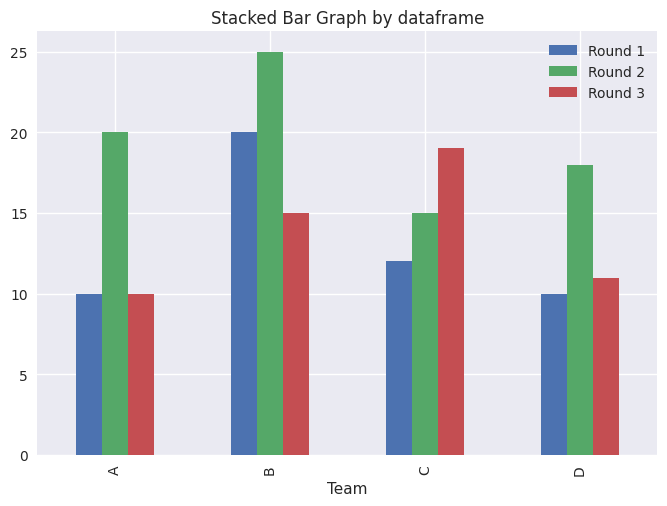

In [85]:
df = pd.DataFrame([['A', 10, 20, 10], 
                   ['B', 20, 25, 15], 
                   ['C', 12, 15, 19],
                   ['D', 10, 18, 11]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3'])
# view data
print(df)
  
# plot data in stack manner of bar type
with plt.style.context('seaborn'):
    df.plot(x='Team', 
        kind='bar',
        title='Stacked Bar Graph by dataframe');